In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Reading the csv file into memory, this assumes you have the file of all addresses in Belgium saved in the following folder

In [2]:
belgium = pd.read_csv('../data/belgium_addresses.csv')

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (5,8,9,10,12,13,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Most common streetname
We can count the amount of times a streetname occurs accross all municipalities. Between the French and Dutch names there are many similarities in names just being translations of eachother.

### Dutch names

In [3]:
# Selecting only Dutch streetnames
streets = belgium[['streetname_nl', 'postcode']].drop_duplicates()
# Grouping on name and counting
result = streets.groupby('streetname_nl').count().rename(columns={'postcode': 'count'}).sort_values(by='count', ascending=False).head(10)
result

,count
streetname_nl,
Kerkstraat,246
Molenstraat,244
Nieuwstraat,208
Schoolstraat,192
Veldstraat,184
Stationsstraat,175
Groenstraat,161
Bosstraat,146
Kloosterstraat,143


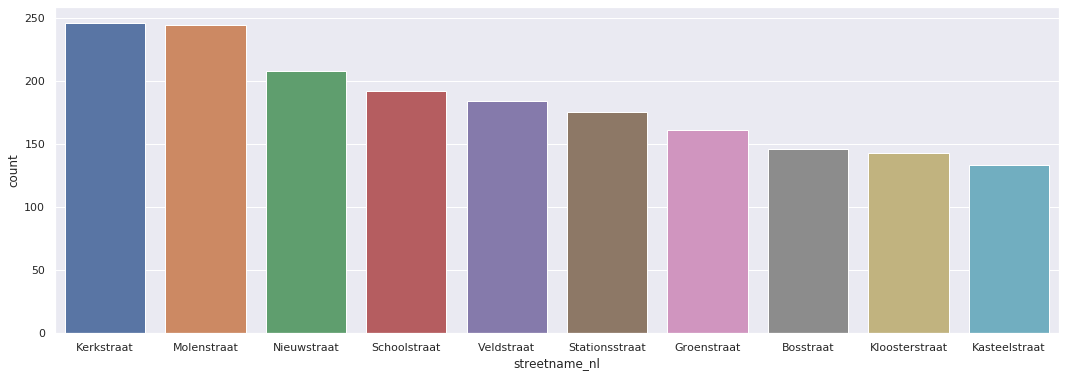

In [4]:
# Plot the result
plt.figure(figsize=(18, 6))
sns.barplot(x='streetname_nl', y='count', data=result.reset_index())

### French names

In [5]:
# Selecting only French streetnames
streets = belgium[['streetname_fr', 'postcode']].drop_duplicates()
# Grouping on name and counting
result = streets.groupby('streetname_fr').count().rename(columns={'postcode': 'count'}).sort_values(by='count', ascending=False).head(10)
result

,count
streetname_fr,
Rue de l'Eglise,187
Rue du Moulin,163
Rue de la Station,133
Rue des Ecoles,128
Rue de la Chapelle,115
Rue du Centre,106
Rue de la Fontaine,106
Rue de la Gare,100
Rue du Château,97


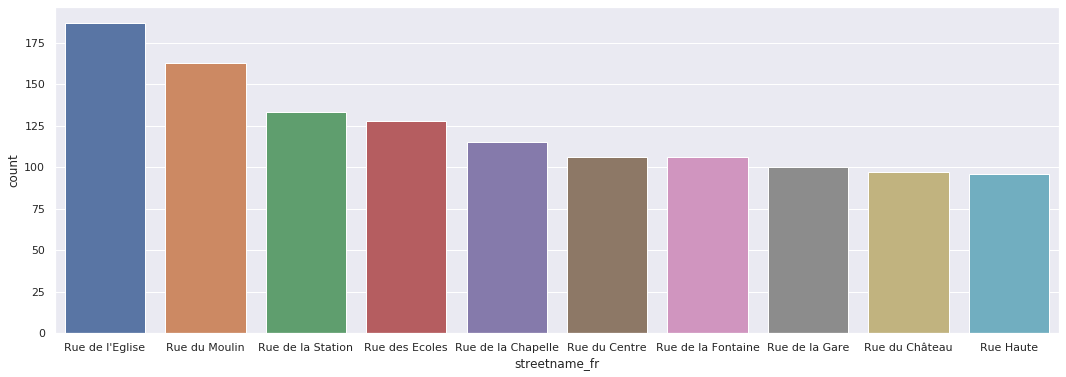

In [6]:
# Plot the result
plt.figure(figsize=(18, 6))
sns.barplot(x='streetname_fr', y='count', data=result.reset_index())

## Longest streetname
As we lack the geo data to compute the actual length of a street we resort to calculating the length of the names of the streets. With the French names there are some odd results where there seem to be comments added to the streetname.

### Dutch names

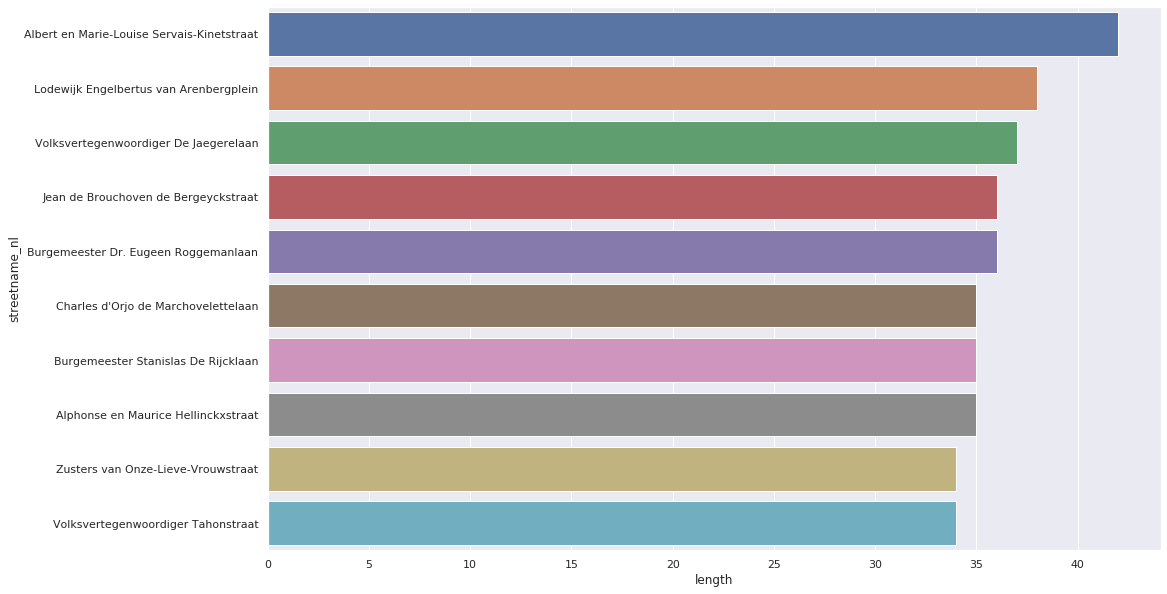

In [7]:
# Select the Dutch names and map to length
long = list(map(lambda street: (len(street), street), belgium['streetname_nl'].dropna().unique()))
# Sort to get the highest length
long.sort(reverse=True)
result = pd.DataFrame(long[:10], columns=['length', 'streetname_nl'])

# Plot the results
plt.figure(figsize=(16, 10))
sns.barplot(y='streetname_nl', x='length', data=result.reset_index(), orient='h')

### French names

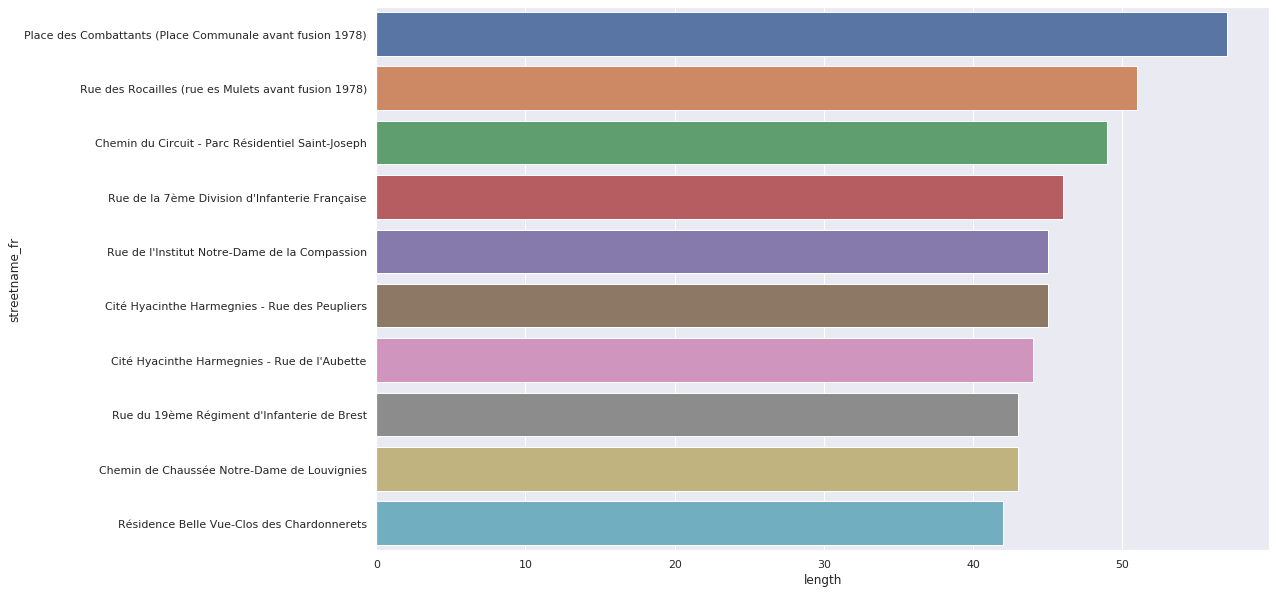

In [8]:
# Select the French names and map to length
long = list(map(lambda street: (len(street), street), belgium['streetname_fr'].dropna().unique()))
# Sort to get the highest length
long.sort(reverse=True)
result = pd.DataFrame(long[:10], columns=['length', 'streetname_fr'])

# Plot the results
plt.figure(figsize=(16, 10))
sns.barplot(y='streetname_fr', x='length', data=result.reset_index(), orient='h')

## Most houses on street
For both the streets in Dutch and in French we can count the amount of houses on each street and see on which streets the highest amount of houses have been built.

### Dutch streets

In [9]:
# Select the housenumbers of each street
streets = belgium[['streetname_nl', 'postcode', 'house_number']].drop_duplicates()
# Group and count
result = streets.groupby(['streetname_nl', 'postcode']).count().rename(columns={'house_number': 'count'}).sort_values(by='count', ascending=False).head(10)
result

,,count
streetname_nl,postcode,
Bredabaan,2930,1046
Kortrijksesteenweg,9000,1013
Koningin Fabiolapark,9100,1000
Hundelgemsesteenweg,9820,997
Kikvorsstraat,9000,956
Zwijnaardsesteenweg,9000,936
Poseidonlaan,8420,920
Bergense Steenweg,1070,897
Alsembergsesteenweg,1180,884


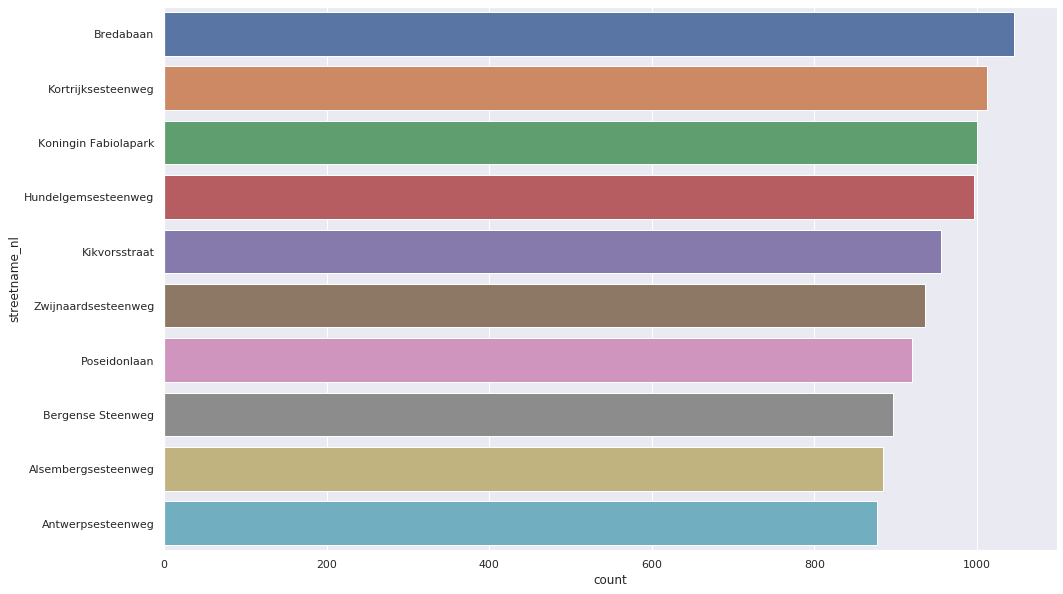

In [10]:
# Plot the results
plt.figure(figsize=(16, 10))
sns.barplot(y='streetname_nl', x='count', data=result.reset_index(), orient='h')

### French streets

In [11]:
# Select the housenumbers of each street
streets = belgium[['streetname_fr', 'postcode', 'house_number']].drop_duplicates()
# Group and count
result = streets.groupby(['streetname_fr', 'postcode']).count().rename(columns={'house_number': 'count'}).sort_values(by='count', ascending=False).head(10)
result

,,count
streetname_fr,postcode,
Chaussée de Mons,1070,897
Chaussée d'Alsemberg,1180,884
Chaussée de Wavre,1160,759
Chaussée de Waterloo,1180,673
Rue de Visé,4020,657
Avenue du Champ de Bataille,7012,625
Chaussée de Haecht,1030,553
Avenue Eugène Mascaux,6001,546
Chaussée de Bruxelles,1410,518


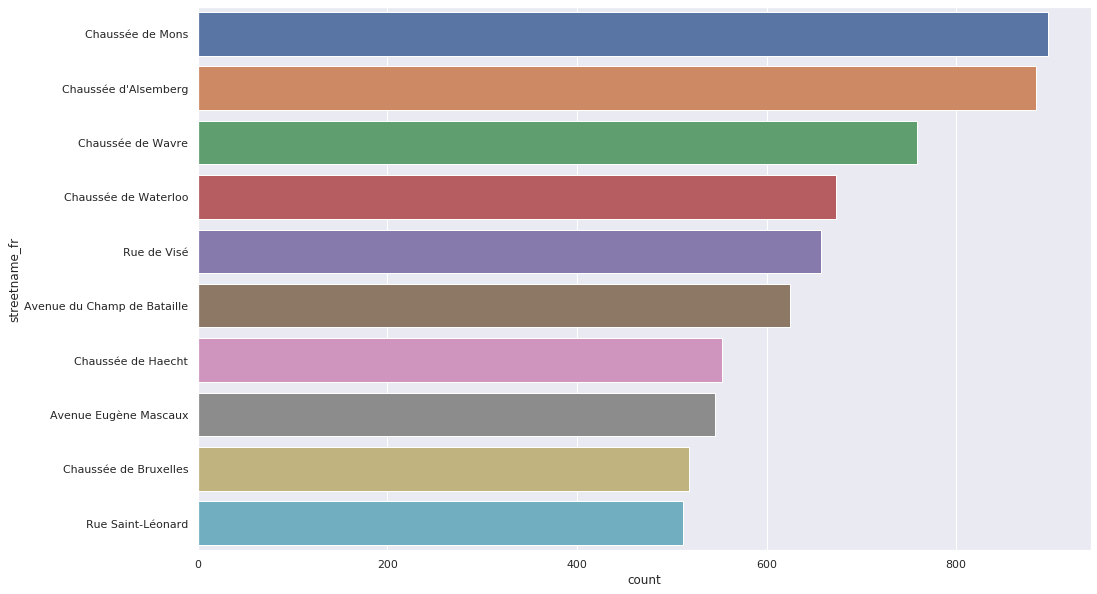

In [12]:
# Plot the results
plt.figure(figsize=(16, 10))
sns.barplot(y='streetname_fr', x='count', data=result.reset_index(), orient='h')